In [8]:
!pip install -q kaggle

In [9]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"karanjakhar7","key":"47816b57144e556869c9fb93c9b3a9d5"}'}

In [10]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [11]:
! cp kaggle.json ~/.kaggle/

In [12]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [13]:
! kaggle datasets list

ref                                                               title                                                 size  lastUpdated          downloadCount  
----------------------------------------------------------------  --------------------------------------------------  ------  -------------------  -------------  
christianlillelund/donald-trumps-rallies                          Donald Trump's Rallies                               720KB  2020-09-26 10:25:08            382  
heeraldedhia/groceries-dataset                                    Groceries dataset                                    257KB  2020-09-17 04:36:08           2237  
andrewmvd/trip-advisor-hotel-reviews                              Trip Advisor Hotel Reviews                             5MB  2020-09-30 08:31:20           1310  
balraj98/stanford-background-dataset                              Stanford Background Dataset                           17MB  2020-09-26 12:57:59            147  
nehaprabhavalkar/india

In [14]:
! kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

 99% 2.28G/2.29G [00:27<00:00, 190MB/s]
100% 2.29G/2.29G [00:28<00:00, 87.6MB/s]


In [15]:
! mkdir train

In [ ]:
! unzip chest-xray-pneumonia.zip -d train

In [17]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
base_dir = '/content/train/chest_xray'

In [20]:
train_dir = os.path.join(base_dir , 'train')
val_dir = os.path.join(base_dir, 'val')

In [44]:
train_datagen = ImageDataGenerator(rescale = 1./255.)

val_datagen = ImageDataGenerator(rescale = 1./255.)

In [45]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size = 20,
    class_mode = 'binary',
    target_size = (300,300))

val_generator  = val_datagen.flow_from_directory(
    val_dir,
    batch_size = 20,
    class_mode = 'binary',
    target_size = (300,300))

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [50]:
model = keras.Sequential([
                          keras.layers.Conv2D(16, kernel_size=(3,3), activation='relu'),
                          keras.layers.MaxPooling2D(2,2),

                          keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
                          keras.layers.MaxPooling2D(2,2),

                          keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
                          keras.layers.MaxPooling2D(2,2),
                          keras.layers.Dropout(0.2),

                          keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
                          keras.layers.MaxPooling2D(2,2),
                          keras.layers.Dropout(0.2),

                          keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
                          keras.layers.MaxPooling2D(2,2),

                          keras.layers.Flatten(),

                          keras.layers.Dense(512, activation='relu'),
                          # keras.layers.Dropout(0.2),
                          # keras.layers.Dense(10, activation = 'relu'),
                          keras.layers.Dense(1, activation='sigmoid')
])

In [51]:
opt = keras.optimizers.Adam(0.0002)
model.compile(optimizer = opt, loss= 'binary_crossentropy', metrics=['accuracy'])

In [48]:
# import other libs as needed for building model
from tensorflow.keras.callbacks import ModelCheckpoint

# add a checkpoint to save the lowest validation loss
filepath = 'saved_model.hdf5'

checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1,
                             save_best_only=True, save_weights_only=False,
                             mode='auto', save_frequency=1)

In [57]:
ACCURACY_THRESHOLD = 0.98

class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('val_accuracy') > ACCURACY_THRESHOLD and epoch>60):   
          print("\nReached %2.2f%% accuracy, so stopping training!!" %(ACCURACY_THRESHOLD*100))   
          self.model.stop_training = True


callbacks = myCallback()

In [58]:
history = model.fit(
    train_generator, validation_data = val_generator, epochs = 100, steps_per_epoch = 20, callbacks = [callbacks])

Epoch 1/100
20/20 [==============================] - 5s 227ms/step - loss: 0.5539 - accuracy: 0.7375 - val_loss: 0.7170 - val_accuracy: 0.5000
Epoch 2/100
20/20 [==============================] - 5s 228ms/step - loss: 0.4596 - accuracy: 0.7700 - val_loss: 0.7190 - val_accuracy: 0.5625
Epoch 3/100
20/20 [==============================] - 4s 217ms/step - loss: 0.3711 - accuracy: 0.8525 - val_loss: 0.8841 - val_accuracy: 0.6250
Epoch 4/100
20/20 [==============================] - 5s 235ms/step - loss: 0.3900 - accuracy: 0.8325 - val_loss: 0.5571 - val_accuracy: 0.6875
Epoch 5/100
20/20 [==============================] - 5s 232ms/step - loss: 0.3421 - accuracy: 0.8575 - val_loss: 0.6655 - val_accuracy: 0.6250
Epoch 6/100
20/20 [==============================] - 4s 223ms/step - loss: 0.2799 - accuracy: 0.8675 - val_loss: 0.5385 - val_accuracy: 0.7500
Epoch 7/100
20/20 [==============================] - 4s 222ms/step - loss: 0.2406 - accuracy: 0.9050 - val_loss: 0.4832 - val_accuracy: 0.8125

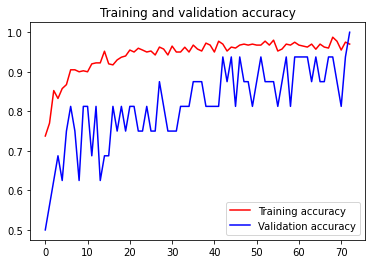

<Figure size 432x288 with 0 Axes>

In [59]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [60]:
test_dir = os.path.join(base_dir, 'test')
test_datagen = ImageDataGenerator(rescale = 1./255.)
test_generator  = test_datagen.flow_from_directory(
    test_dir,
    batch_size = 20,
    class_mode = 'binary',
    target_size = (300,300))

Found 624 images belonging to 2 classes.


In [61]:
model.evaluate(test_generator)

32/32 [==============================] - 6s 186ms/step - loss: 0.4284 - accuracy: 0.8429


[0.4284075200557709, 0.8429487347602844]

In [62]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, None, None, 16)    448       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, None, None, 16)    0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, None, None, 32)    4640      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, None, None, 32)    0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, None, None, 32)    9248      
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, None, None, 32)    0         
_________________________________________________________________
dropout_10 (Dropout)         (None, None, None, 32)   